#### TASK 1 RESULTS :

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython import display

This is the results of the task 1 : 

In [232]:
# transform the file in csv
read_file = pd.read_csv(r'losses_and_results/results_task_1.txt')
read_file.to_csv (r'losses_and_results/results_task_1.csv', index=None)

# read the csv file
df_task_1 = pd.read_csv("losses_and_results/results_task_1.csv")

df_task_1 = df_task_1.rename(columns={"Non_rhymes\t": "Non_rhymes"})
df_task_1 = df_task_1.rename(columns={"Accuracy": "Percentage"})
df_task_1 = df_task_1.rename(columns={"Name": "Time"})

In [233]:
df_task_1['ratio_keeped'] = df_task_1['rhymes']*200/(df_task_1['rhymes']*2+df_task_1['discarded'])

In [234]:
df_task_1['ratio_keeped'] = 100-df_task_1['ratio_keeped']

In [235]:
df_task_1

,Time,Size,rhymes,discarded,Epochs,Percentage,Perfect,Assonant,Non_rhymes,ratio_keeped
0,baseline,328,4123,0,0,7.6140,4.3035,6.6208,89.0756,0.000000
1,epoch10,53,528,253,10,25.0000,21.7803,6.4394,71.7803,19.327731
2,epoch20,52,523,242,20,32.8872,30.4015,4.9713,64.6272,18.788820
3,epoch30,53,500,277,30,41.0000,37.8000,6.4000,55.8000,21.691464
4,epoch40,53,477,316,40,43.6059,39.6226,7.9665,52.4109,24.881890
5,epoch50,53,471,240,50,53.9278,50.5308,6.7941,42.6752,20.304569
6,epoch60,53,463,268,60,53.7797,50.7559,6.0475,43.1965,22.445561
7,epoch70,53,445,276,70,58.2022,56.1798,4.0449,39.7753,23.670669
8,epoch80,53,464,258,80,58.2974,55.3879,5.8190,38.7931,21.753794
9,epoch90,53,456,246,90,57.5658,54.8246,5.4825,39.6930,21.243523


In [236]:
# ratio keeped
df1 = df_task_1.drop(index=0, axis=0)

In [237]:
df1['ratio_keeped'].describe()

count    10.000000
mean     21.410802
std       1.911331
min      18.788820
25%      20.076142
50%      21.467494
75%      22.272619
max      24.881890
Name: ratio_keeped, dtype: float64

<AxesSubplot: xlabel='Time', ylabel='Percentage'>

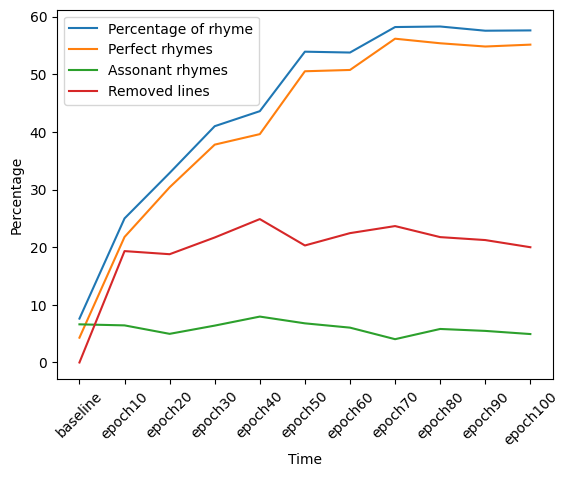

In [238]:
plt.xticks(rotation=45)
sns.lineplot(df_task_1, x="Time", y="Percentage", label='Percentage of rhyme')
sns.lineplot(df_task_1, x="Time", y="Perfect", label='Perfect rhymes')
sns.lineplot(df_task_1, x="Time", y="Assonant", label='Assonant rhymes')
sns.lineplot(df_task_1, x="Time", y="ratio_keeped", label='Removed lines')

<AxesSubplot: xlabel='Time', ylabel='Non_rhymes'>

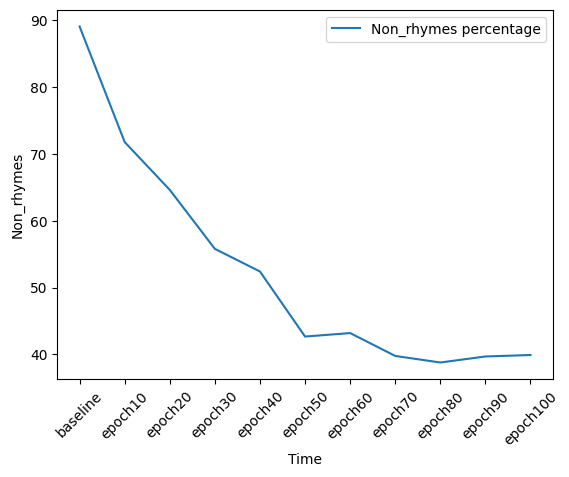

In [239]:
plt.xticks(rotation=45)
sns.lineplot(df_task_1, x="Time", y="Non_rhymes", label='Non_rhymes percentage')

<AxesSubplot: xlabel='Time', ylabel='ratio_keeped'>

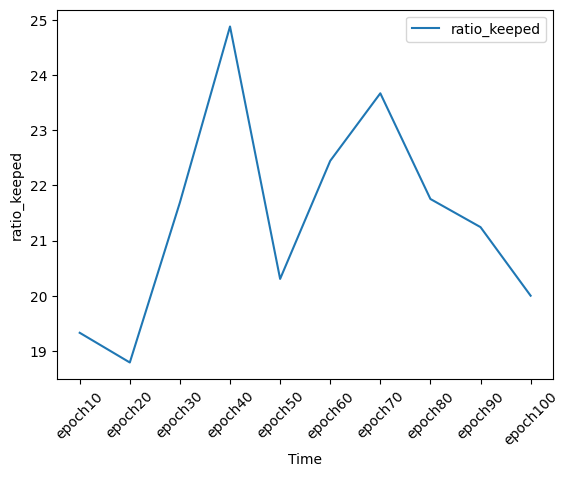

In [240]:
plt.xticks(rotation=45)
sns.lineplot(df1, x="Time", y="ratio_keeped", label='ratio_keeped')

In [241]:
def process_data_frame(df):
    new_df = pd.DataFrame()
    new_df['epoch'] = df.apply(lambda x: x['epoch'])
    new_df['learning_rate'] = df.apply(lambda x: x.get('learning_rate'))
    new_df['loss'] = df.apply(lambda x: x.get('loss'))
    new_df['step'] = df.apply(lambda x: x.get('step'))
    return new_df

In [242]:
def plot_df(df):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.plot(df['epoch'], df["learning_rate"], label='learning_rate', color='m')
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("learning_rate")
    ax1.legend()


    ax2.plot(df['epoch'], df["loss"], label='loss')
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("loss")
    ax2.legend()

This is the result every 10 epochs (from 10 to 100 epochs).
For the first 10 epochs, we've lost the data but we were able recover the graphs.
For the other epochs, we have a json file that contains the log of the training.
By running all theses cells you'll retreive the informations of each 10 epochs and plot the learning rate and the training loss.

The goal here is to scrap the json files from the checkpoint, at each 10 epochs step for the training of our model.
With this, we'll gather information about :

-Epochs

-Learning rate

-loss

-step number

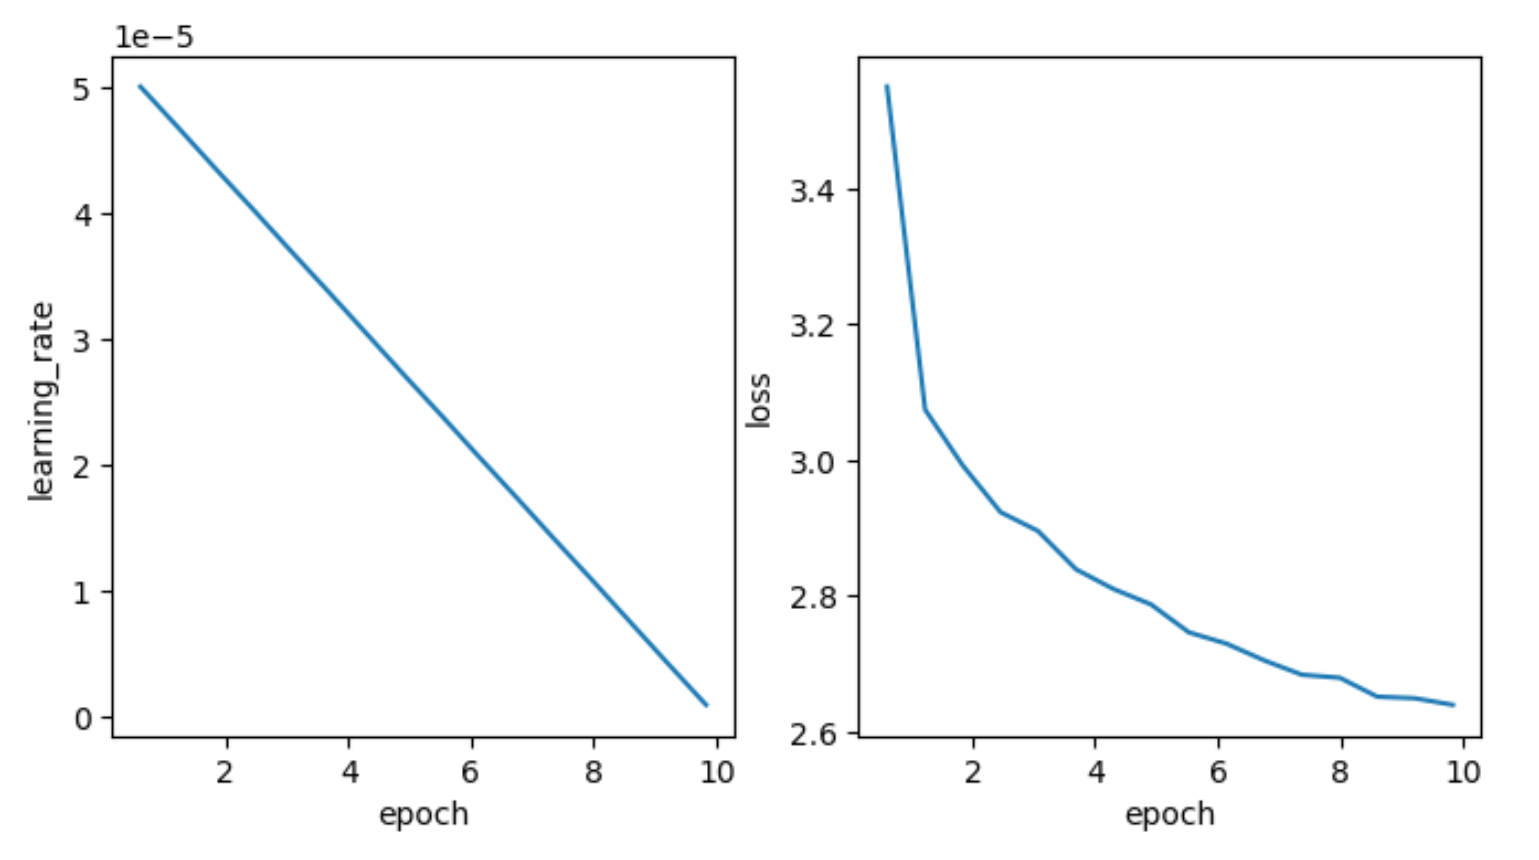

In [243]:
display.Image("images rapport/task_1_epoch10_lr_loss.png")

In [244]:
df_20 = pd.read_json('checkpoints_task_1/checkpoint-8000_20/trainer_state.json')['log_history']

In [245]:
df_log_20 = process_data_frame(df_20).dropna()

This was for saving the informations of the batch of 10 epochs (having a copy of the logs is always useful).

In [246]:
# with open('df_log_20.txt', 'w', encoding='utf-8') as f:
        # for index, row in df_log_20.iterrows():
            # f.write(str(row))
            # f.write('\n')

,epoch,learning_rate,loss,step
0,0.61,0.000050,2.6353,500
1,1.23,0.000047,2.6110,1000
3,1.84,0.000043,2.5927,1500
4,2.46,0.000040,2.5448,2000
6,3.07,0.000037,2.5356,2500


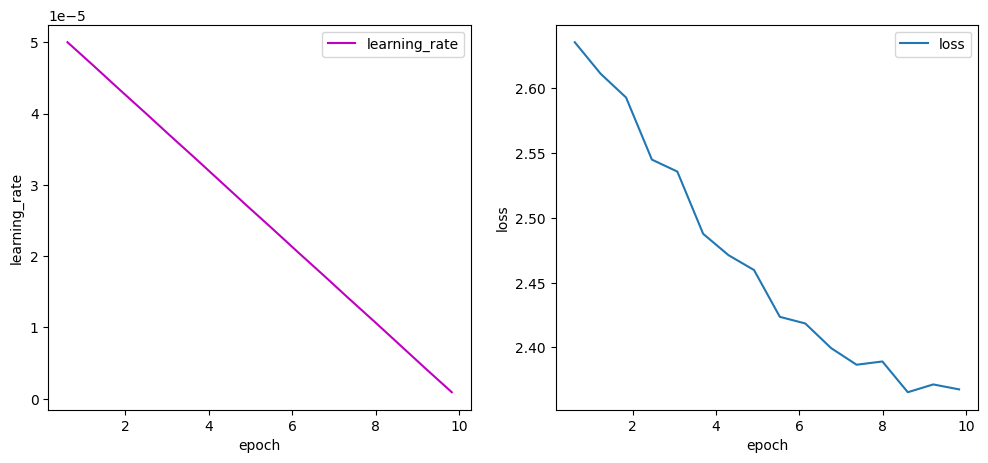

In [247]:
plot_df(df_log_20)

df_log_20.head()

In [248]:
df_30 = pd.read_json('checkpoints_task_1/checkpoint-8000_30/trainer_state.json')['log_history']

In [249]:
df_log_30 = process_data_frame(df_30).dropna()

,epoch,learning_rate,loss,step
0,0.61,0.000050,2.3321,500
1,1.23,0.000047,2.2571,1000
3,1.84,0.000043,2.2601,1500
4,2.46,0.000040,2.2199,2000
6,3.07,0.000037,2.2201,2500


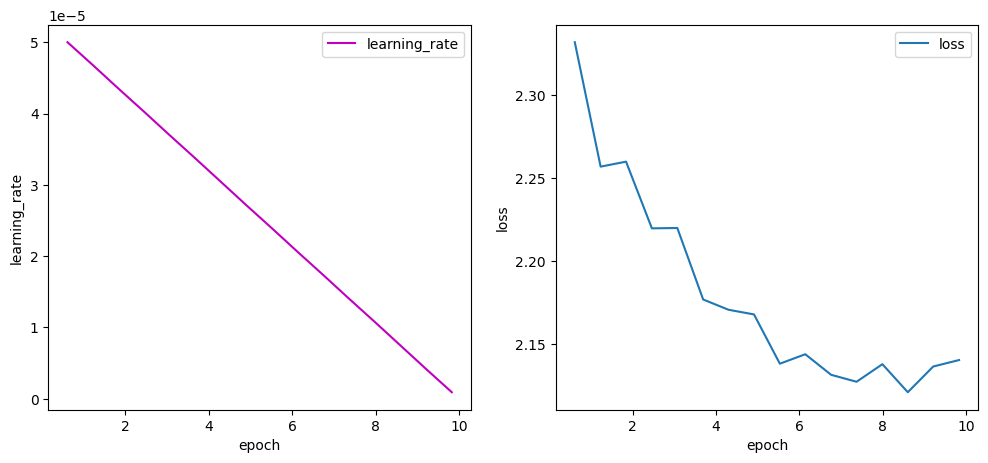

In [250]:
plot_df(df_log_30)

df_log_30.head()

In [251]:
df_40 = pd.read_json('checkpoints_task_1/checkpoint-8000_40/trainer_state.json')['log_history']

In [252]:
df_log_40 = process_data_frame(df_40).dropna()

,epoch,learning_rate,loss,step
0,0.61,0.000050,2.0564,500
1,1.23,0.000047,1.9174,1000
3,1.84,0.000043,1.9373,1500
4,2.46,0.000040,1.9077,2000
6,3.07,0.000037,1.9177,2500


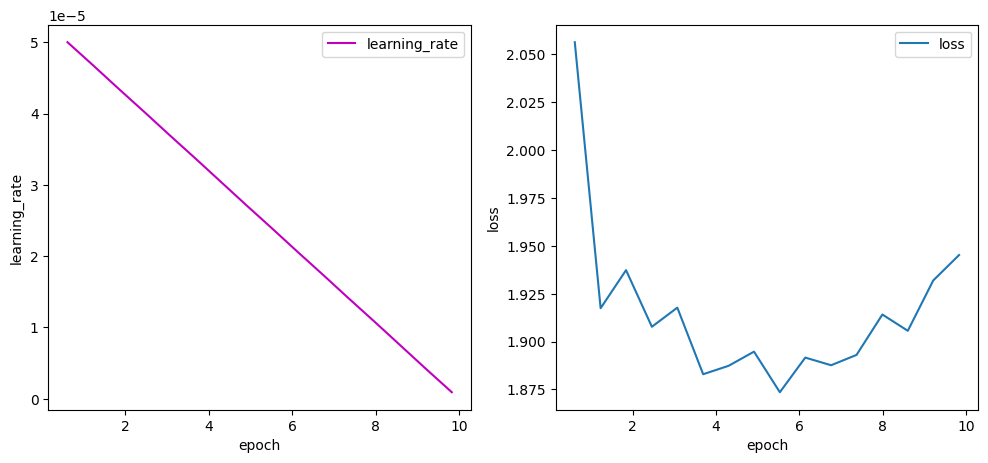

In [253]:
plot_df(df_log_40)

df_log_40.head()

In [254]:
df_50 = pd.read_json('checkpoints_task_1/checkpoint-8000_50/trainer_state.json')['log_history']

In [255]:
df_log_50 = process_data_frame(df_50).dropna()

,epoch,learning_rate,loss,step
0,0.61,0.000050,1.8010,500
1,1.23,0.000047,1.5991,1000
3,1.84,0.000043,1.6277,1500
4,2.46,0.000040,1.6109,2000
6,3.07,0.000037,1.6317,2500


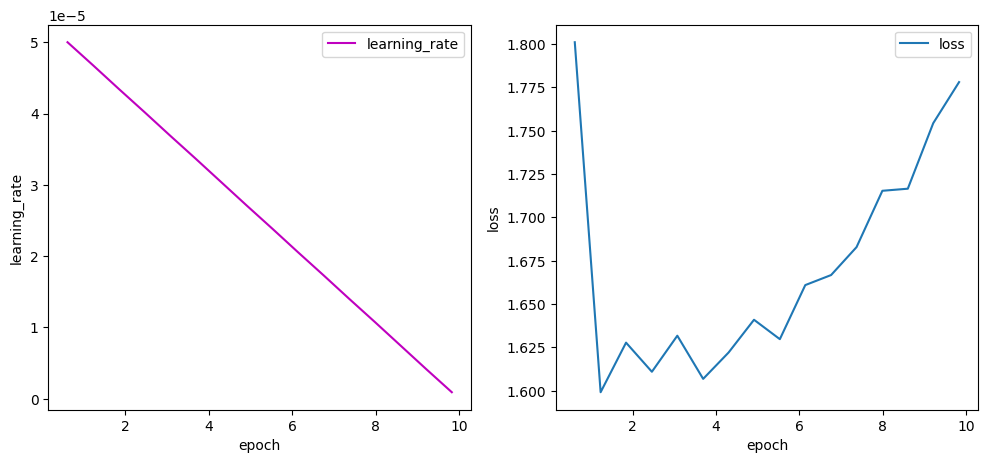

In [256]:
plot_df(df_log_50)

df_log_50.head()

In [257]:
df_60 = pd.read_json('checkpoints_task_1/checkpoint-8000_60/trainer_state.json')['log_history']

In [258]:
df_log_60 = process_data_frame(df_60).dropna()

,epoch,learning_rate,loss,step
0,0.61,0.000050,1.5699,500
1,1.23,0.000047,1.3046,1000
3,1.84,0.000043,1.3414,1500
4,2.46,0.000040,1.3364,2000
6,3.07,0.000037,1.3672,2500


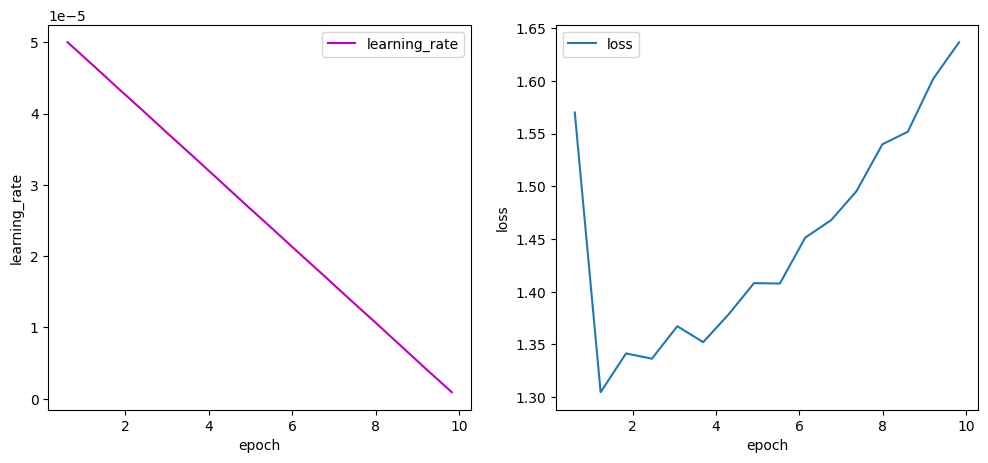

In [259]:
plot_df(df_log_60)

df_log_60.head()

In [260]:
df_70 = pd.read_json('checkpoints_task_1/checkpoint-8000_70/trainer_state.json')['log_history']

In [261]:
df_log_70 = process_data_frame(df_70).dropna()

,epoch,learning_rate,loss,step
0,0.61,0.000050,1.3635,500
1,1.23,0.000047,1.0390,1000
3,1.84,0.000043,1.0830,1500
4,2.46,0.000040,1.0910,2000
6,3.07,0.000037,1.1257,2500


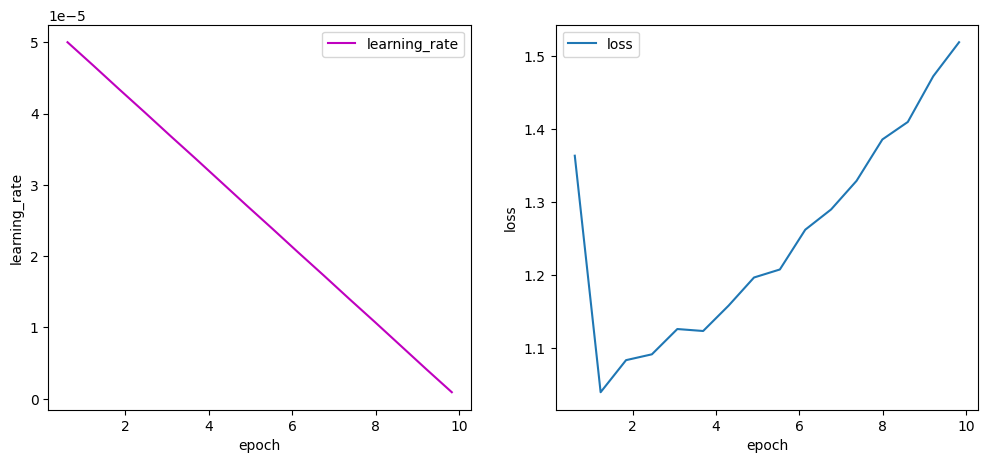

In [262]:
plot_df(df_log_70)

df_log_70.head()

In [263]:
df_80 = pd.read_json('checkpoints_task_1/checkpoint-8000_80/trainer_state.json')['log_history']

In [264]:
df_log_80 = process_data_frame(df_80).dropna()

16

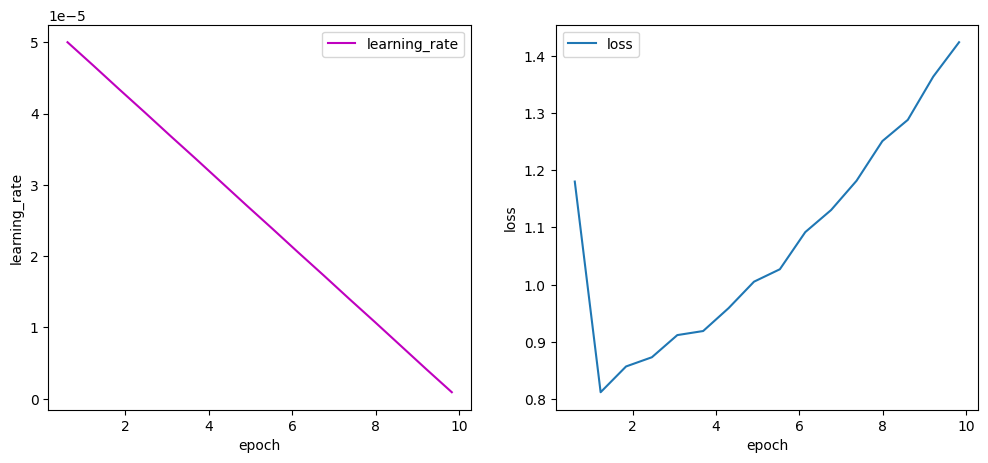

In [265]:
plot_df(df_log_80)

len(df_log_80)

In [266]:
df_90 = pd.read_json('checkpoints_task_1/checkpoint-8000_90/trainer_state.json')['log_history']

In [267]:
df_log_90 = process_data_frame(df_90).dropna()

16

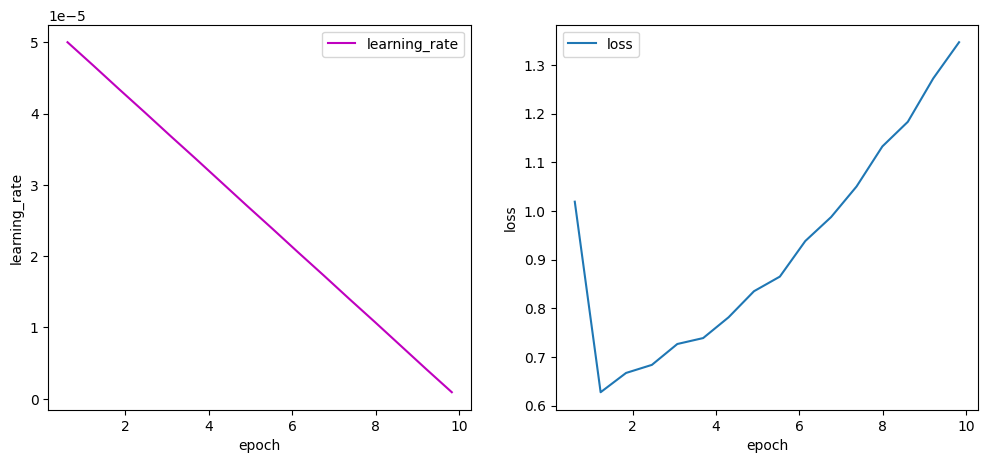

In [268]:
plot_df(df_log_90)

len(df_log_90)

In [269]:
df_100 = pd.read_json('checkpoints_task_1/checkpoint-8000_100/trainer_state.json')['log_history']

In [270]:
df_log_100 = process_data_frame(df_100).dropna()

,epoch,learning_rate,loss,step
0,0.61,5.000000e-05,0.8798,500
1,1.23,4.672775e-05,0.4832,1000
3,1.84,4.345550e-05,0.5181,1500
4,2.46,4.018325e-05,0.5280,2000
6,3.07,3.691099e-05,0.5684,2500
7,3.69,3.363874e-05,0.5849,3000
9,4.30,3.036649e-05,0.6258,3500
10,4.91,2.709424e-05,0.6848,4000
12,5.53,2.382199e-05,0.7209,4500
13,6.14,2.054974e-05,0.7985,5000


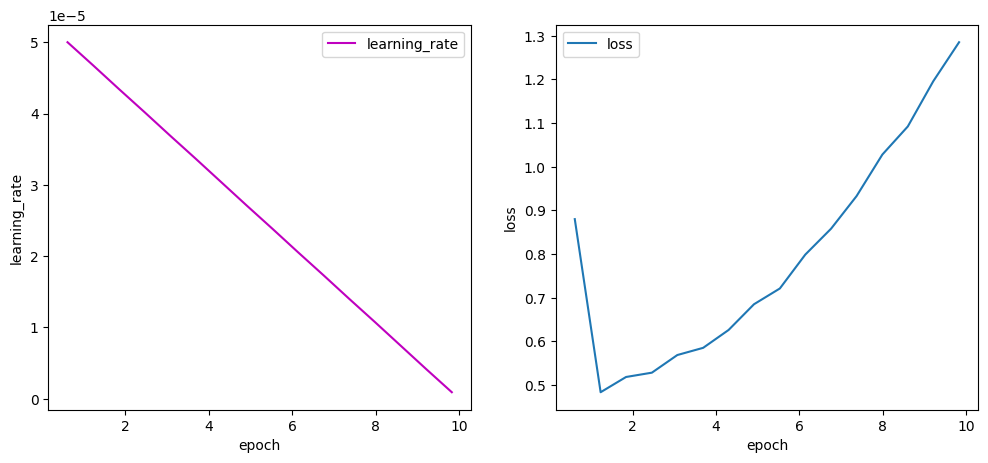

In [271]:
plot_df(df_log_100)

df_log_100

Let's concat all df_logs to plot training loss from epoch 10 to epoch 100

In [272]:
frames = [df_log_20, df_log_30, df_log_40, df_log_50, df_log_60, df_log_70, df_log_80, df_log_90, df_log_100]

In [273]:
result = pd.concat(frames)

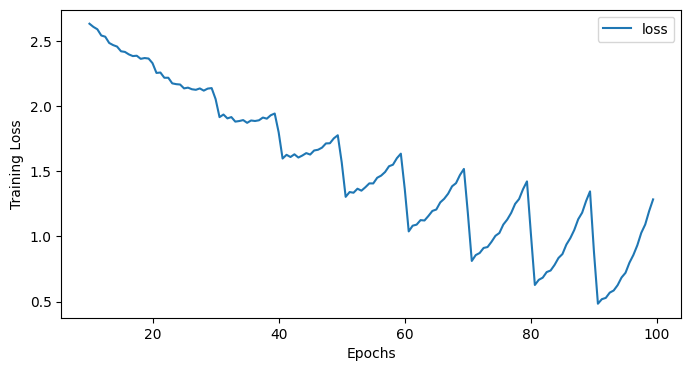

In [274]:
x = range(0, len(result), 1)
x_df = pd.DataFrame(x)
x_df = x_df.apply(lambda elem: 10 +(elem/16) * 10)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(x_df, result['loss'], label='loss')
ax.set_xlabel("Epochs")
ax.set_ylabel("Training Loss")
ax.legend()

Now we plot the TRAINING_LOSS and VALIDATION_LOSS from epoch 50 to 100 (we've lost few validation data from the first epochs)

In [275]:
# transform the file in csv
read_file = pd.read_csv(r'losses_and_results/losses_exp1.txt')
read_file.to_csv (r'losses_and_results/losses_exp1.csv', index=None)
# read the csv file
df_losses = pd.read_csv("losses_and_results/losses_exp1.csv")

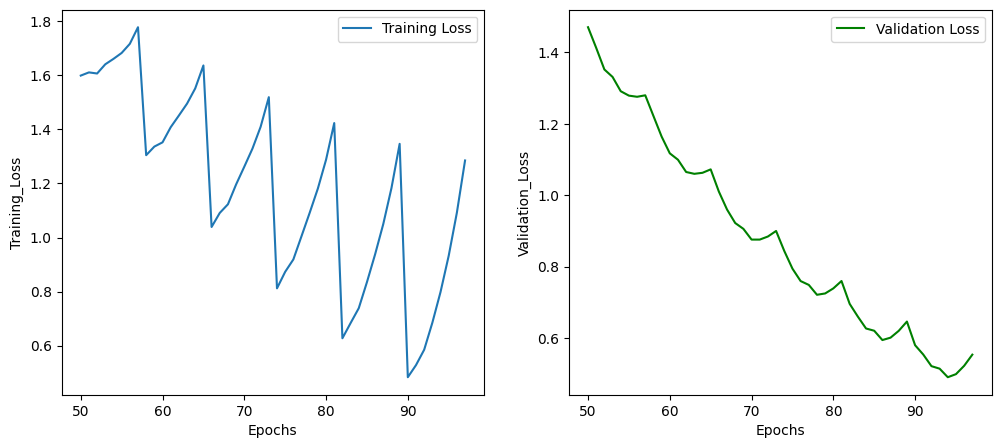

In [276]:
y = range(50 + len(df_losses))
y = y[50:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(y, df_losses['Training_Loss'], label='Training Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Training_Loss")
ax1.legend()

ax2.plot(y, df_losses['Validation_Loss'], label='Validation Loss', color='g')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Validation_Loss")
ax2.legend()